<a href="https://colab.research.google.com/github/Noob919/NNfSiX/blob/master/mat_Neural_net_parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install all the essential libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score

Read the data in DataFrame using Pandas

In [ ]:
df =  pd.read_csv("/content/parkinsons.data")

Drop the colum "NAMES" from the dataframe 

In [ ]:
df_final = df.drop(columns= "name", axis= 1)

Now seprate the labels from rest of the dataframe

In [ ]:
X = df_final[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
y = df_final['status']

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

Transform the Data using z-normalisation

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)

Now, split the data for the training and testing purpose

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (156, 22) (156,)
Test set: (39, 22) (39,)


In [ ]:
from tensorflow.keras import datasets, layers, models

MAIN MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(22,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

Model compilation

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

Summary model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               5888      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

Now, fit the data in the model

In [ ]:
h = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
5/5 [==============================] - 1s 45ms/step - loss: 0.6888 - accuracy: 0.6218 - val_loss: 0.6121 - val_accuracy: 0.7436
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 0.4209 - accuracy: 0.8397 - val_loss: 0.5553 - val_accuracy: 0.7436
Epoch 3/15
5/5 [==============================] - 0s 8ms/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.5213 - val_accuracy: 0.8462
Epoch 4/15
5/5 [==============================] - 0s 9ms/step - loss: 0.2531 - accuracy: 0.9038 - val_loss: 0.5005 - val_accuracy: 0.8462
Epoch 5/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1925 - accuracy: 0.9295 - val_loss: 0.4794 - val_accuracy: 0.8718
Epoch 6/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1817 - accuracy: 0.9359 - val_loss: 0.4618 - val_accuracy: 0.8718
Epoch 7/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1430 - accuracy: 0.9551 - val_loss: 0.4469 - val_accuracy: 0.8974
Epoch 8/15
5/5 [================

In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Accuracy Graph for training and testing

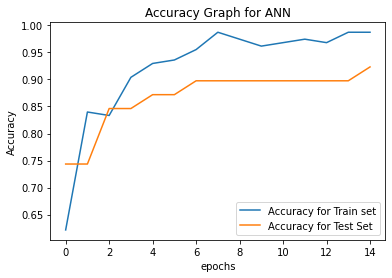

In [ ]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

Loss curve for the traning and testing

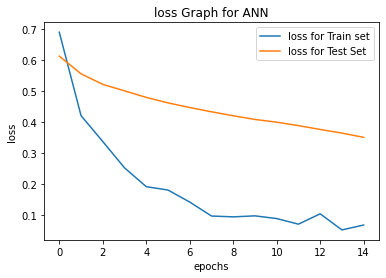

In [ ]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

Making predictions using the model on the training set

In [ ]:
y_pred_2 = model.predict_classes(X_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Result of the prediction on trainig set

Confusion matrix is  [[ 34   2]
 [  1 119]]
Accuracy Score is  0.9807692307692307
f1_Score  is  0.9875518672199171
precison is 0.9834710743801653
recall is 0.9916666666666667


Text(0.5, 1.0, 'Confusion metric of Train Data for ANN')

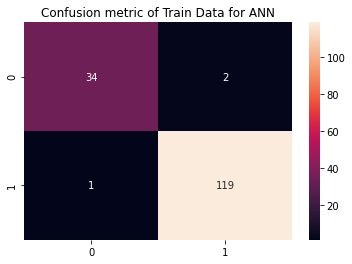

In [ ]:
print("Confusion matrix is ", confusion_matrix(y_train,y_pred_2))
print("Accuracy Score is ", accuracy_score(y_train,y_pred_2))
print("f1_Score  is ", f1_score(y_train,y_pred_2))
print("precison is", precision_score(y_train,y_pred_2))
print("recall is", recall_score(y_train,y_pred_2))
cf_matrix = confusion_matrix(y_train,y_pred_2)
sns.heatmap(cf_matrix, annot=True,fmt = 'd')
plt.title('Confusion metric of Train Data for ANN')

Text(0.5, 1.0, 'Results On Train Data')

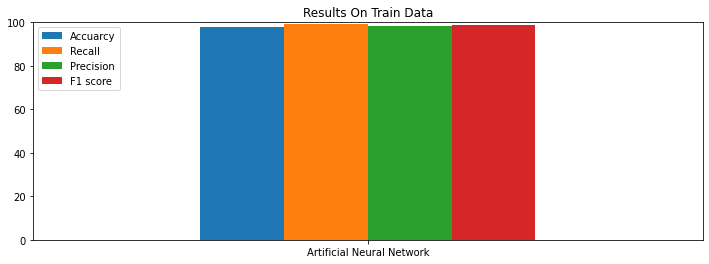

In [3]:
d = [[98.07],[99.16],[98.364],[98.75]] 
df = pd.DataFrame(data=d, columns = ['Artificial Neural Network'],
                  index = ['Accuarcy', 'Recall','Precision','F1 score'])
df1 = df.transpose()

df1.plot( kind = 'bar', figsize = [12,4])
plt.xticks(rotation='horizontal')
plt.ylim([0,100])
plt.legend(loc = 'upper left')
plt.title('Results On Train Data')

Making predictions using the model on the test set

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Result of predictions on test set

Confusion matrix is  [[ 9  3]
 [ 0 27]]
Accuracy Score is  0.9230769230769231
f1_Score  is  0.9473684210526316
precison is 0.9
recall is 1.0


Text(0.5, 1.0, 'Confusion metric of Test Data for ANN')

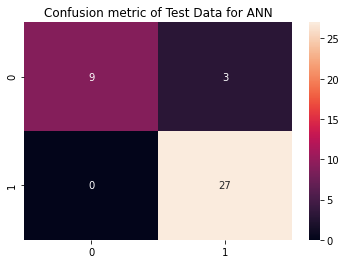

In [ ]:
print("Confusion matrix is ", confusion_matrix(y_test,y_pred))
print("Accuracy Score is ", accuracy_score(y_test,y_pred))
print("f1_Score  is ", f1_score(y_test,y_pred))
print("precison is", precision_score(y_test,y_pred))
print("recall is", recall_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion metric of Test Data for ANN')

Text(0.5, 1.0, 'Results On Test Data')

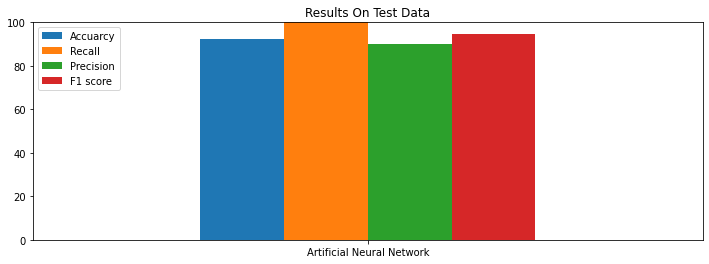

In [4]:
d = [[92.30],[100],[90.00],[94.73]] 
df = pd.DataFrame(data=d, columns = ['Artificial Neural Network'],
                  index = ['Accuarcy', 'Recall','Precision','F1 score'])
df1 = df.transpose()

df1.plot( kind = 'bar', figsize = [12,4])
plt.xticks(rotation='horizontal')
plt.ylim([0,100])
plt.legend(loc = 'upper left')
plt.title('Results On Test Data')